In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# link para o dataset https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits
train = pd.read_csv('optdigits.tra', header=None)
test = pd.read_csv('optdigits.tes', header=None)

In [3]:
# a ultima coluna do data set é o label correto do digito
# cada digito tem 64 features em um array (64,0)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [6]:
train.shape

(3823, 65)

In [4]:
#separar o dataset de treino em features e labels

x_train = train[range(0,64)]
y_train = train[64]
x_test = test[range(0,64)]
y_test = test[64]

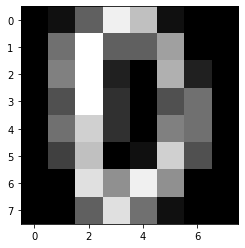

In [7]:
# observando o primeiro digito do data set em imagem
# função imshow transforma data em imagem, localizando o primeiro valor do dataset, reshape para um quadrado, em escala de cinza
plt.imshow(x_train.iloc[0].values.reshape(8,8), cmap='gray') 
plt.show()

[[0 0 7 4 6 2 5 5 0 8]
 [7 1 9 5 3 0 4 7 8 4]
 [7 8 5 9 1 2 0 6 1 8]
 [7 0 7 6 9 1 9 3 9 4]
 [9 2 1 9 9 6 4 3 2 8]]


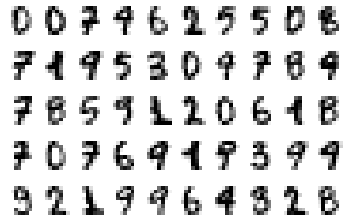

In [6]:
%matplotlib inline 
#não precisa escrever o plt.show() para plotar os graficos

# mostrar as primeiras 50 figuras do dataset x_train
idx = 0
for i in range(50):
    plt.subplot(5, 10, idx+1) #os subplots são correspondentes ao range, total de imagens a plotar
    plt.imshow(
        x_train.iloc[idx].values.reshape(8,8), # 64 features de cada digito, organizados em uma matriz de 8x8
        cmap='gray_r', #transforma em escala de cinza invertido com o fundo branco
        interpolation='nearest' #
    )
    plt.axis('off') #retira os eixos de cada figura
    idx += 1


# printar os labels das imagens
print(y_train.iloc[0:50].values.reshape(5,10))

In [11]:
# estabelecendo o modelo
from sklearn.svm import SVC
# gamma = suaviza as front
model = SVC(kernel='rbf', C=1, gamma=0.001, random_state=1)
model.fit(x_train, y_train)

SVC(C=1, gamma=0.001, random_state=1)

In [12]:
# usando os dados para teste, predizendo o resultado e confrontando com os labels corretos para acurácia
y_predict = model.predict(x_test)
score = accuracy_score(y_test, y_predict)
score

0.9827490261547023

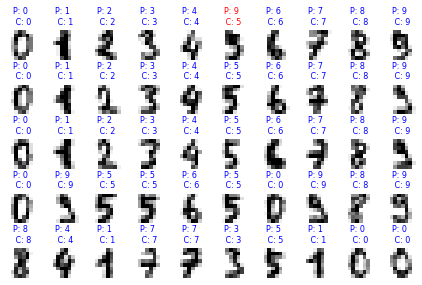

In [13]:
# comparando os resultados obtidos no modelo com a label correta - imagem
%matplotlib inline

idx = 0
fig = plt.figure()
for i in range(50):
    plt.subplot(5, 10, idx+1) #os subplots são correspondentes ao range, total de imagens a plotar e o index para cada um
    plt.imshow(
        x_test.iloc[idx].values.reshape(8,8), # 64 features de cada digito, organizados em uma matriz de 8x8
        cmap='gray_r', #transforma em escala de cinza invertido com o fundo branco
        interpolation='nearest' 
    )
    plt.axis('off') #retira os eixos de cada figura
    funcaocor = 'b' if y_predict[idx] == y_test[idx] else 'r' #função para a cor da legenda dos digitos 
    plt.title('P: %i \n C: %i'%(y_predict[idx], y_test[idx]), fontsize=8, color=funcaocor)
    idx = idx +1
fig.set_tight_layout(True) # alinha as legendas

    

In [10]:
# Matriz de confusão, para avaliar a precisão da classificação

In [11]:
#Importando as bibliotecas
import itertools
#intertools é um módulo para construção de loopings - nesse codigo usaremos o product
import numpy as np
from sklearn.metrics import confusion_matrix


In [12]:
cm = confusion_matrix(y_test, y_predict)
#eixos da matriz

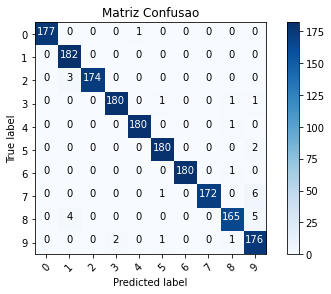

In [13]:
classes = range(10)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) #para exibir os dados como uma imagem, 'mais proximo' por isso fica quadriculado
plt.title('Matriz Confusao')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()